<a href="https://colab.research.google.com/github/dvisionst/KMeans_Find_K_Core/blob/main/Kmeans_Find_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans: Find K (Core)

- Jose Flores
- 15 August 2022

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can download the data here. The original data is from this data source.



Use KMeans to create various customer segments.
Use an Elbow Plot of inertia
And a plot of Silhouette Scores
Choose a K based on the results.
Submit your notebook below.

In [26]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

In [27]:
# importing csv and creating a df
df = pd.read_csv('/content/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [28]:
# dropping the columns that are not neated for this clustering problem
df.drop(columns=['Unnamed: 0', 'Customer Id'], inplace=True)
df.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [30]:
print(f"Duplicates: {df.duplicated().sum()}\n\n")

df.isna().sum()

Duplicates: 0




Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [31]:
# Instantiating a scaler
scaler = StandardScaler()
freq_imputer =  SimpleImputer(strategy='most_frequent')

num_pipe = make_pipeline(scaler, freq_imputer)
# Fitting and transforming the data
scaled_df = num_pipe.fit_transform(df)

In [34]:
# creating a elbow plot of inertias and looping through a range

inertias =[]

# looping from 2 to 10 range(2, 11)
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)


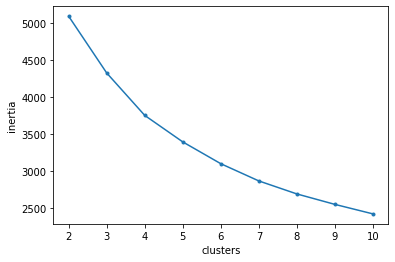

In [35]:
plt.plot(range(2,11), inertias, marker='.');
plt.xlabel('clusters');
plt.ylabel('inertia');

In [37]:
s_scores =[]

# looping from 2 to 10 range(2, 11)
for num in range(2, 11):
  kmeans = KMeans(n_clusters=num)
  kmeans.fit_transform(scaled_df)
  s_scores.append(silhouette_score(scaled_df, kmeans.labels_))


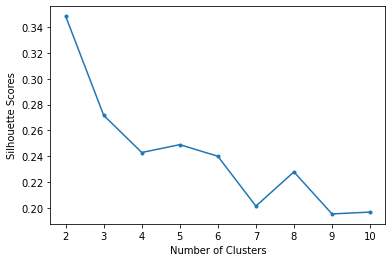

In [38]:
plt.plot(range(2,11), s_scores, marker='.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Scores');